# Linear and quadratic convergence

**CYBR 304** 
_Spring 2024_ 

Let's define a sequence $F$ recursively by 
$$
   F_k = \begin{cases}  7 & k = 0 \\ \frac{9 F_{k-1}  + 2}{10}  & k > 0 \end{cases}
$$
Assuming that $F$ converges, say  $\lim_\infty F = L$, we have
$$
    L = \frac{9 L + 2}{10}
$$
Solving this for $L$ gives $L = 2$.  We've proved that if $F$ converges, it converges to $2$.  Let's verify this numerically.

A simple recursive Julia function that evaluates $F$ is 

function F(k::Int64)
    if k == 0
        7
    else 
        (9 * F(k-1) + 2)/10
    end
end

In [24]:
using Gadfly

In [25]:
Y = [F(k) for k = 1:50];

In [26]:
X = [k for k = 1:50];

The graph looks like it convergence to $2$

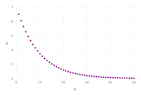

In [27]:
plot(x = X, y = Y,  color=[colorant"purple"])

Actually given an negative input, our Julia code is an infinite loop.  Let's fix that:

In [28]:
function F(k::Int64)
    if k < 0
         throw(DomainError(F, "Argument to F must be a nonnegative integer"))
    elseif k == 0
        7
    else 
        (9 * F(k-1) + 2)/10
    end
end

F (generic function with 1 method)

In [29]:
F(-1)

LoadError: DomainError with F:
Argument to F must be a nonnegative integer

Since the compiler isn't smart enough to compile our function `F` into a non recursive function, we can do it ourselves

In [68]:
function FF(n::Int64)    
    (n > -1) || throw(DomainError(F, "Argument to F must be a nonnegative integer"))    
    f0 = 7
    k = 0
    while k < n
        f0 = (9*f0 + 2)/10
        k += 1
    end
    f0   
end

FF (generic function with 1 method)

One quick comparison:

In [69]:
(F(13), FF(13))

(3.2709329141644994, 3.2709329141644994)

Finally, I mention that it's possible to write this function as a coroutine, but I'll leave that for you all to do.

Actually, we can show that the convergence is linear. We have
$$
   F_{k} - 2 = \frac{9F_{k-1}  + 2}{10} - 2
$$
This simplifies to
$$
   F_{k} - 2 = \frac{9 F_{k-1}  - 18}{10}
$$
So
$$
 \frac{   |F_{k} - 2| }{|F_{k-1} - 2 |}  = \frac{9}{10}
$$
And this tells us that $F$ converges linearly.

Just for fun, let's convert this function to be a memoizating function.  We'll need to load the Memoization package

In [45]:
using Memoization

In [46]:
@memoize function G(k::Int64)
    println(k)
    (k > -1) || throw(DomainError(G, "Argument to F must be a nonnegative integer")) 
    if k == 0
        7
    else 
         (9 * G(k-1) + 2)/10
    end
end

G (generic function with 1 method)

In [47]:
G(10)

10
9
8
7
6
5
4
3
2
1
0


3.7433922004999993

In [48]:
G(10)

3.7433922004999993

Now define a function $H$ by 
$$
   H_k = \begin{cases} 1 & k = 0 \\ \frac{H_{k-1}^2 + 9}{2 H_{k-1}} \end{cases}
$$
Assuming $H$ converges to $L$, we have
$$
   L = \frac{L^2 + 9}{2 L}
$$
Solving this for $L$ gives either $L= -3$ or $L=3$.  It's not too hard to show that $H_k > 0$, so we suspect that $H$ converges to $3$. Specifically $H$ converges quadratically.  To show this, we have
$$
   H_k - 3 = \frac{H_{k-1}^2 + 9}{2 H_{k-1}} - 3 = \frac{H_{k-1}^2 - 6 H_{k-1} + 9}{2 H_{k-1}} =
      \frac{(H_{k-1} - 3)^2}{2 H_{k-1}}
$$
So
$$
   \frac{|H_k - 3|}{|(H_{k-1} - 3)^2|} =  \frac{1}{2 H_{k-1}}
$$
So
$$
   \lim_{k \to \infty} \frac{|H_k - 3|}{|H_{k-1} - 3|^2} =  \lim_{k \to \infty} \frac{1}{2 H_{k-1}} = \frac{1}{6}
$$
This says that $H$ converges to 3 _quadratically_.

Here is a quickly done Julia implementation of $H$

In [58]:
function H(k::Int64)
    (k > -1) || throw(DomainError(H, "Argument to H must be a nonnegative integer"))  
    
    if k == 0
        1
    else
        (H(k-1)^2 + 9)/(2*H(k-1))
    end
end

H (generic function with 1 method)

In [59]:
Y = [H(k) for k = 1:15]

15-element Vector{Float64}:
 5.0
 3.4
 3.023529411764706
 3.00009155413138
 3.000000001396984
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0
 3.0

In [56]:
X = [k for k = 1:15]

15-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15

Compared to linear convergence, this sequence converges almost immediately.

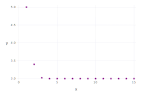

In [57]:
plot(x=X,y=Y, color=[colorant"purple"])

In [ ]:
Here is an iterative version of the Julia function $H$

In [70]:
function HH(n::Int64)
    (n > -1) || throw(DomainError(H, "Argument to HH must be a nonnegative integer"))      
    h = 1
    k = 0
    while k < n
        h = (h^2 + 9)/(2*h)
        k += 1
    end
    h
end

HH (generic function with 1 method)

In [71]:
HH(3)

3.023529411764706

In [67]:
H(3)

3.023529411764706

And if you want use one less local variable, sure

In [76]:
function HHH(n::Int64)
    (n > -1) || throw(DomainError(H, "Argument to HH must be a nonnegative integer"))      
    h = 1
    while n > 0
        h = (h^2 + 9)/(2*h)
        n -= 1
    end
    h
end

HHH (generic function with 1 method)

In [77]:
HHH(3)

3.023529411764706

In [75]:
HH(3)

3.023529411764706